In [15]:
from pathlib import Path

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

import tifffile

import numpy as np

In [2]:
def read_3d_volume(fileName, nx, ny, nz, dtype=np.float32):

    #print('Reading 3D volume file: ', fileName)
    f = open(fileName, "rb")
    data = np.fromfile(f, dtype=dtype)

    #size = nx*ny*nz
    shape = (nz, ny, nx)

    return data.reshape(shape)

In [18]:
input_path = Path('P:\\batteries')

data_path = Path('c:\\Users\\fe0968\\Documents\\data\\batteries\\segmentation\\volumes')
labels_path = Path('c:\\Users\\fe0968\\Documents\\data\\batteries\\segmentation\\labels')

In [27]:
# Volume sizes for GFD_100mV, GFD_200mV, GFD_300mV
#volume_sizes = [(777, 627, 500), (778,629,500), (776, 635, 500)]

volume_sizes = {'GFD_100': (777, 627, 500), 'GFD_200': (778,629,500), 'GFD_300': (776, 635, 500),
                'GFA_300': (577, 530, 590)}


for d in list(volume_sizes.keys()):
    for frame in ['01', '02']:
        
    dataset = d
    
    air = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_air.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)
    mem = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_mem.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)
    gask = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_gask.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)
    vol = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_data.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)

    labels = air / 255 + mem / 255 * 2 + gask / 255 * 3
    
    tifffile.imwrite(data_path / f'{dataset}_tomo{frame}.tif', vol, dtype = np.uint8)
    tifffile.imwrite(labels_path / f'{dataset}_tomo{frame}.tif', labels.astype(np.uint8))
    
    

In [28]:
list(volume_sizes.keys())

['GFD_100', 'GFD_200', 'GFD_300', 'GFA_300']

In [8]:
mem = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_mem.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)
gask = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_gask.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)


In [13]:
vol = read_3d_volume(input_path / f'{dataset}mV_tomo_{frame}_data.raw', volume_sizes[dataset][0], volume_sizes[dataset][1], volume_sizes[dataset][2], np.uint8)


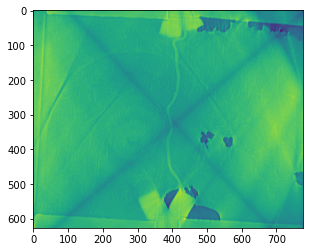

In [14]:
plt.imshow(vol[200])

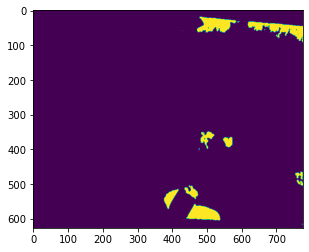

In [7]:
plt.imshow(air[200])

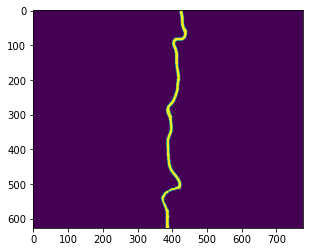

In [9]:
plt.imshow(mem[200])

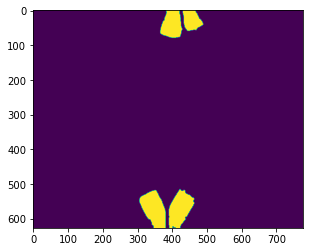

In [10]:
plt.imshow(gask[200])

In [11]:
labels = air / 255 + mem / 255 * 2 + gask / 255 * 3

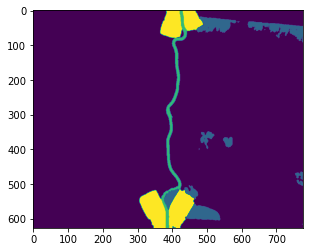

In [12]:
plt.imshow(labels[200])

In [23]:
tifffile.imwrite(data_path / f'{dataset}_tomo{frame}.tif', vol, dtype = np.uint8)
tifffile.imwrite(labels_path / f'{dataset}_tomo{frame}.tif', labels.astype(np.uint8))